%%html

# Week 6 Project 2
Data 620

Spring 2020

Jenkins



## Week Six - Core Reading
Please read:

Social Network Analysis for Startups, Chapter 5: "2-Mode Networks" and Chapter 6: "Going Viral!  Information Diffusion."


## How to analyze a 2-mode network as a 1-mode network
"Two-mode networks are rarely analysed without transforming them. This is because most network measures are solely defined for one-mode networks, and only a few of them have been redefined for two-mode networks (Borgatti and Everett, 1997; Latapy et al., 2008). Transforming a two-mode network to a one-mode network is often done using a method known as projection. This method operates by selecting one of the two node sets (often the primary node set) and linking nodes from that set if they were connected to at least one common node in the other set. Although the two-mode structure is discarded in this process, it is possible to define tie weights based on it. Specifically, the tie weights are often defined as the number of common nodes. This method was extended by Newman (2001) who argued that tie weights among authors in scientific collaboration networks should be discounted if the authors collaborated on papers with many others. For more information, see the page on projection."

Please read:

Opsahl, T. (2013): Defining Two-mode Networks

Opsahl, T. (2013): Projection. Provides code in R for transforming a two-mode network.

You may want to consider the methods described in the short articles above when you work on your Week 6 assignment and Project 2.


## Week Seven - Overview
This week, you'll work with text mining and natural language processing (NLP). 


Project 2 due.


Item



## Project 2


Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

What can you infer about each of the distinct groups?

You may work in a small group on the project.


Your code and analysis should be delivered in an IPython Notebook by end of day Monday 3/15. 

Resources to complete assignmet

* Blog post discussing project http://bactra.org/weblog/1149.html
* Files and R code for original project https://sites.google.com/site/dsmgraphs/Home/files
* Original study https://jamanetwork.com/journals/jamapsychiatry/fullarticle/208671
* Clear descriptions of metrics applied to graphs https://academic.oup.com/gigascience/article/7/4/giy014/4875933

* Practical code https://statsmaths.github.io/stat289-f18/solutions/tutorial14-networkx.html

# Book Examples


In [29]:

# twitter data and code adapted from here:
# https://github.com/maksim2042/SNABook

print ()

 
import networkx
import networkx.generators.small
from networkx import generators

# G = networkx.generators.small.bull_graph()
# G = networkx.generators.diamond_graph()
# G = networkx.generators.small.krackhardt_kite_graph()
# G = networkx.karate_club_graph()

# twitter retweet network:
#     twitter symptomss are nodes; retweets are links between nodes
#     over time people tend to retweet from those they trust
#     so over time a twitter retweet network is a proxy for trust networks
G=networkx.read_pajek("egypt_retweets.net")

print ("Number of Nodes:")
print (G.number_of_nodes())
print ()

print ("Number of Edges:")
print (G.number_of_edges())
print ()
 


FileNotFoundError: [Errno 2] No such file or directory: 'egypt_retweets.net'

In [30]:

import sys
import os
import csv 
import math
import networkx as nx
import matplotlib.pyplot as plt

## Import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi

In [4]:

G=nx.read_pajek("egypt_retweets.net")
print(len(G))
#G=nx.Graph(e)
x = [len(G.subgraph(c)) for c in nx.connected_components(G)] 
x[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'egypt_retweets.net'

In [5]:
#G.edge_list()

In [6]:
plt.hist(x)
[s for s in x if s > 10]



NameError: name 'x' is not defined

In [7]:
print ()

# Islands:
#     trim edges that are weak (ex: only retain edges with >= 25 retweets).
#     what remains is subcores of maximal activity between nodes that have 
#         developed a trust relationship.

In [8]:

def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight: 
            g2.add_edge(f,to)
            g2.edges[f, to].update(edata)
    return g2 
    

cc=next(nx.connected_components(G))

print ('Threshold', 'Nodes', 'Islands')
for threshold in range(0,25):
    g = trim_edges(G, threshold)
    print (threshold, g.number_of_nodes(), len(next(nx.connected_components(g))))
print ()

NameError: name 'G' is not defined

https://github.com/Diwahars/Python-Scripts-2/blob/master/NetworkMeasures.py

In [9]:
 
import csv
with open('campaign_short.csv', newline='', encoding='utf-8') as f:
    r = csv.reader(f)
    #for row in r:
    #    print(row)
    #    break
    ## Read the data from a CSV file
    ## We use the Universal new-line mode since many CSV files are created with Excel
    #r=csv.reader(open('campaign_short.csv','r'))

    ## 2-mode graphs are usually directed. Here, their direction implies money flow
    g=nx.Graph()

    ## we need to keep track separately of nodes of all types
    pacs=[]
    candidates=[]

    ## Construct a directed graph from edges in the CSV file
    for row in r: 
        if row[0] not in pacs: 
            pacs.append(row[0])
        if row[12] not in candidates: 
            candidates.append(row[12])
        g.add_edge(row[0],row[12], weight=int(row[10]))
#list(g.edges)

FileNotFoundError: [Errno 2] No such file or directory: 'campaign_short.csv'

In [10]:
## compute the projected graph
pacnet=bi.weighted_projected_graph(g, pacs, ratio=False)
#pacnet=next(nx.connected_components(pacnet))
#print(pacnet)
#print(pacnet.edges(data=True)) 
weights=[math.log(dict(edata)['weight']) for f,t,edata in pacnet.edges(data=True)]

NameError: name 'g' is not defined

In [11]:
nx.draw_networkx(pacnet,width=weights, edge_color=weights)

NameError: name 'pacnet' is not defined

In [12]:
## Compute the candidate network
cannet=bi.weighted_projected_graph(g, candidates, ratio=False)
#cannet=next(nx.connected_components(cannet))
weights=[math.log(dict(edata)['weight']) for f,t,edata in cannet.edges(data=True)]
plt.figure(2) ## switch to a fresh canvas
nx.draw_networkx(cannet,width=weights, edge_color=weights)

NameError: name 'g' is not defined

In [13]:
plt.figure(3)
plt.hist(weights)



NameError: name 'weights' is not defined

<Figure size 432x288 with 0 Axes>

In [14]:
## The weights histogram is logarithmic; we should compute the original weight = e^log_weight
cannet_trim=trim_edges(cannet, weight=math.exp(0.9))

plt.figure(4)

NameError: name 'cannet' is not defined

In [15]:

## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in cannet_trim.edges(data=True)]
nx.draw_networkx(cannet_trim,width=weights, edge_color=weights)

NameError: name 'cannet_trim' is not defined

https://raw.githubusercontent.com/Diwahars/Python-Scripts-2/master/NetworkMeasures.py

http://bactra.org/weblog/1149.html part reprod

# work

In [16]:

#input_data=np.matrix([[1,1],[2,1]])
#df2 = pd.concat([input_data, input_data.T]).fillna(0) 


#df2 = df2.reindex(df2.columns)
#df2 = df2.astype(int)
#graph = nx.from_numpy_matrix(df2, create_using=nx.DiGraph, parallel_edges=True)
#graph = nx.relabel_nodes(graph, dict(enumerate(df2.columns)))

In [32]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
import networkx
import networkx.generators.small
from networkx import generators

In [33]:
symptoms = pd.read_csv('symptoms.csv', header=None, index_col=False).values.tolist()
disorders = pd.read_csv('disorders.csv', header=None, index_col=False).values.tolist()

In [34]:
input_data = pd.read_csv('disordermatrix.txt', sep='\t')#, dtype='int')

In [45]:
input_data.columns = [d[0].replace('\n','') for d in disorders]
input_data.index = [s[0].replace('\n','').replace(' ','_')[:50] for s in symptoms]

AttributeError: 'int' object has no attribute 'replace'

In [35]:
input_data =input_data.astype('int')

In [8]:
input_data.head()

,Mental Retardation,Reading Disorder,Mathematics Disorder,Disorder of Written Expression,Developmental Coordination Disorder,Expressive Language Disorder,Mixed Receptive-Expressive Language Disorder,Phonological Disorder,Stuttering,Autistic Disorder,Rett's Disorder,Childhood Disintegrative Disorder,Asperger 's Disorder,"Attention-Defict/Hyperactivity Disorder, Combined Type","Attention-Defict/Hyperactivity Disorder, Predominantly Inattentive Type","Attention-Defict/Hyperactivity Disorder, Predominantly Hyperactive-Impulsive Type","Conduct Disorder, Childhood-Onset Type","Conduct Disorder, Adolescent-Onset Type.","Conduct Disorder, Unspecified Onset",Oppositional Defiant Disorder,Pica,Rumination Disorder,Feeding Disorder of Infancy or Early Childhood,Tourette's Disorder,Chronic Motor or Vocal Tic Disorder,Transient Tic Disorder,Encopresis with Constipation and Overflow Incontinence,Encopresis without Constipation and Overflow Incontinence,Enuresis,Separation Anxiety Disorder,Selective Mutism,Reactive Attachment Disorder of Infancy or Early Childhood,Stereotypic Movement Disorder,Delirium,Dementia of the Alzheimer’s Type,Vascular Dementia With Delirium,Vascular Dementia With Delusions,Vascular Dementia With Depressed Mood:,Vascular Dementia Uncomplicated,Amnestic Disorder,...,Fetishism,Frotteurism,Pedophilia,Sexual Masochism,Sexual Sadism,Transvestic Fetishism,Voyeurism,Gender Identity Disorder in Children,Gender Identity Disorder in Adolescents or Adults,Anorexia Nervosa,Bulimia Nervosa,Primary Insomnia,Primary Hypersomnia,Narcolepsy,Breathing-Related Sleep Disorder,Circadian Rhythm Sleep Disorder,Nightmare Disorder,Sleep Terror Disorder,Sleepwalking Disorder,Intermittent Explosive Disorder,Kleptomania,Pyromania,Pathological Gambling,Trichotillomania,Adjustment Disorder With Depressed Mood,Adjustment Disorder With Anxiety,Adjustment Disorder With Mixed Anxiety and Depressed Mood,Adjustment Disorder With Disturbance of Conduct,Adjustment Disorder With Mixed Disturbance of Emotions and Conduct,Adjustment Disorder Unspecified,Paranoid Personality Disorder,Schizoid Personality Disorder,Schizotypal Personality Disorder,Antisocial Personality Disorder,Borderline Personality Disorder,Histrionic Personality Disorder,Narcissistic Personality Disorder,Avoidant Personality Disorder,Dependent Personality Disorder,Obsessive-Compulsive Personality Disorder
Concurrent_deficits_or_impairments_in_social/inter,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
failure_to_develop_peer_relationships,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Loss_of_social_skills_or_adaptive_behavior,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Expressive_language_development_is_under_expected_,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Loss_of_expressive_or_receptive_language,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#G2 = nx.read_adjlist('disordermatrix.txt', delimiter='\t', nodetype=int, create_using=nx.DiGraph())
 

In [43]:
edge_list = []
no_edge_list = []

for r in range(input_data.shape[0]):
  for c in range(input_data.shape[1]):
    if input_data.iloc[r,c] == 1:
        edge_list += [(input_data.index[r], input_data.columns[c], 1),] 
    else:
        no_edge_list += [(input_data.index[r], input_data.columns[c], 0),]



#G.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

In [44]:
#edge_list

In [39]:

import numpy as np
G = nx.Graph()
edgelist = np.array(edge_list)
G.add_weighted_edges_from(edgelist)

In [40]:

G.add_nodes_from(set(input_data.index), bipartite = 0)
G.add_nodes_from(set(input_data.columns), bipartite = 1) 
print(bipartite.is_bipartite(G))

True


In [41]:
G.nodes() #G = nx.relabel_nodes(G, dict(enumerate(input_data.columns)))
#G.edges()

NodeView(('0', '0.8', '0.10', '0.11', '1', '2', '0.4', '0.5', '0.9', '3', '4', '0.3', '5', '6', '0.39', '0.63', '0.65', '0.66', '7', '0.62', '8', '9', '0.43', '0.51', '0.53', '0.58', '10', '11', '0.27', '12', '0.31', '13', '0.77', '0.78', '0.80', '0.81', '14', '0.54', '15', '16', '0.45', '0.49', '17', '0.47', '18', '0.48', '0.57', '19', '0.56', '20', '21', '22', '0.18', '0.83', '0.85', '0.140', '0.141', '23', '0.84', '24', '0.129', '25', '0.21', '26', '0.70', '0.71', '0.74', '0.75', '0.76', '27', '0.55', '28', '29', '30', '31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '32', '33', '34', '0.60', '0.68', '35', '0.67', '36', '0.69', '37', '0.46', '0.50', '0.72', '38', '39', '0.139', '40', '0.61', '41', '0.73', '42', '0.12', '0.13', '43', '44', '45', '0.44', '0.59', '46', '47', '0.124', '0.132', '0.133', '0.135', '48', '49', '0.79', '50', '0.144', '51', '0.32', '52', '0.92', '53', '54', '0.93', '0.95', '55', '0.94', '56', '0.101', '0.102', '57', '0.91', '58', '0.116', '59', '0.117', 

In [42]:
symptoms = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
diagnosis = set(G) - top_nodes

KeyError: 'bipartite'

In [42]:
#symptoms, diagnosis = bipartite.sets(G)
print("Number of symptoms nodes: ", len(symptoms))
print("Number of diagnosis nodes: ", len(diagnosis))
symptoms_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
diagnosis_nodes = set(G) - symptoms_nodes

Number of symptoms nodes:  434
Number of diagnosis nodes:  148


In [43]:
print(bipartite.density(G, symptoms))
print(bipartite.density(G, diagnosis))
s = bipartite.projected_graph(G, symptoms)
d = bipartite.projected_graph(G, diagnosis)

0.0145099016066758
0.0145099016066758


In [1]:
symnet=bipartite.weighted_projected_graph(G, symptoms, ratio=False)

NameError: name 'bipartite' is not defined

582
[31, 277, 11, 11, 13, 19]


[208, 7, 12, 9, 8, 23, 17, 7, 8, 8, 9, 8, 8, 8, 6, 10]

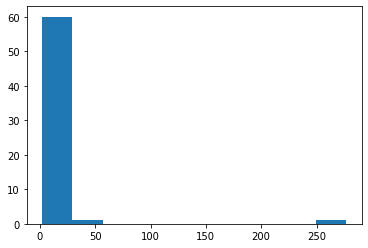

In [46]:
#Components with more than 5 connections
print(len(G))
x = [len(G.subgraph(c)) for c in nx.connected_components(G)] 
x[:10]
plt.hist(x)
print([s for s in x if s > 10])
[len(c) for c in list(s.subgraph(b) for b in nx.connected_components(s)) if len(c) > 5]

In [57]:

def trim_edges(g, weight=0):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
      if int(edata['weight']) > weight: 
          g2.add_edge(f,to)
          g2.edges[f, to].update(edata)
    return g2 
    
 

print ('Threshold', 'Nodes', 'Islands')
for threshold in range(0,1):
    g = trim_edges(G, threshold)
    print (threshold, g.number_of_nodes(), len(next(nx.connected_components(g))))
print ()
#
#    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]


#cc=list([G.subgraph(n) for n in nx.connected_components(G)])[0] 

Threshold Nodes Islands
0 582 31



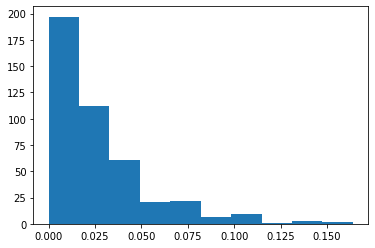

In [61]:
####  Convert Graph G to a matrix format: A Convert Graph G to a matrix format: A
A = nx.to_numpy_matrix(G)
#Users Network
#Distribution of Degrees Centrality of the Network of Users
plt.hist(list(nx.degree_centrality(s).values()))
plt.show()

In [63]:
#Nodes with high degree centrality 
def nodes_with_highest_deg_cent(h):
    deg_cent = nx.degree_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes
 
top_dc = nodes_with_highest_deg_cent(s)
 
print(top_dc)

{'denial_of_the_seriousness_of_the_current_low_body_'}


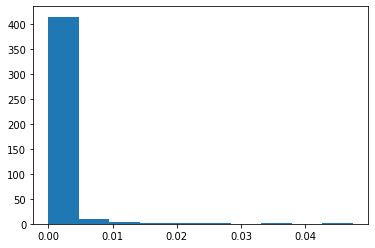

In [65]:
#Distribution of betweenness centrality

plt.hist(list(nx.betweenness_centrality(s).values()))
plt.show()

In [66]:

#Nodes with hgh betweeness centrality
 
def nodes_with_highest_bet_cent(h):
    deg_cent = nx.betweenness_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes
 
top_bet = nodes_with_highest_bet_cent(s)
 
print(top_bet)

{'piloerection'}


In [68]:
#Eigenvector Centrality
from operator import itemgetter
eigen_cent = nx.eigenvector_centrality(s)
 
# Assign each to an attribute in your network
nx.set_node_attributes(s, eigen_cent, 'eigenvector')
 
sorted_eigenvector = sorted(eigen_cent.items(), key=itemgetter(1), reverse=True)
 
print("Top 10 nodes by Eigenvector centrality:")
for e in sorted_eigenvector[:10]:
    print(e,  nx.get_node_attributes(s, 'eigenvector')[e[0]])
#Top 10 nodes by Eigenvector centrality:

Top 10 nodes by Eigenvector centrality:
('psychomotor_agitation_/_restlessness', 0.19598009756581705) 0.19598009756581705
('denial_of_the_seriousness_of_the_current_low_body_', 0.1933355363510949) 0.1933355363510949
('psychomotor_retardation', 0.18883958263778958) 0.18883958263778958
('persistent_failure_to_eat_adequately_with_signific', 0.17968443225123762) 0.17968443225123762
('insomnia_/_difficulty_falling_or_staying_asleep', 0.17688983844533862) 0.17688983844533862
('feels_uncomfortable_or_helpless_when_alone_because', 0.1746838079668193) 0.1746838079668193
('fatigue_/_fatigue_or_loss_of_energy_/_being_easily', 0.17358653231650747) 0.17358653231650747
('A_delusion_develops_in_an_individual_in_the_contex', 0.17257097236858382) 0.17257097236858382
('increased_appetite', 0.17154871351115727) 0.17154871351115727
('flight_of_ideas_or_subjective_experience_that_thou', 0.1652386901748409) 0.1652386901748409


In [69]:
#symptoms that are totaly connected
 
largest_clique_s = sorted(nx.find_cliques(s), key=lambda x:len(x))[-1]
 
glcu = s.subgraph(largest_clique_s)
len(glcu)

33

In [73]:
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 582
Number of edges: 932
Average degree:   3.2027


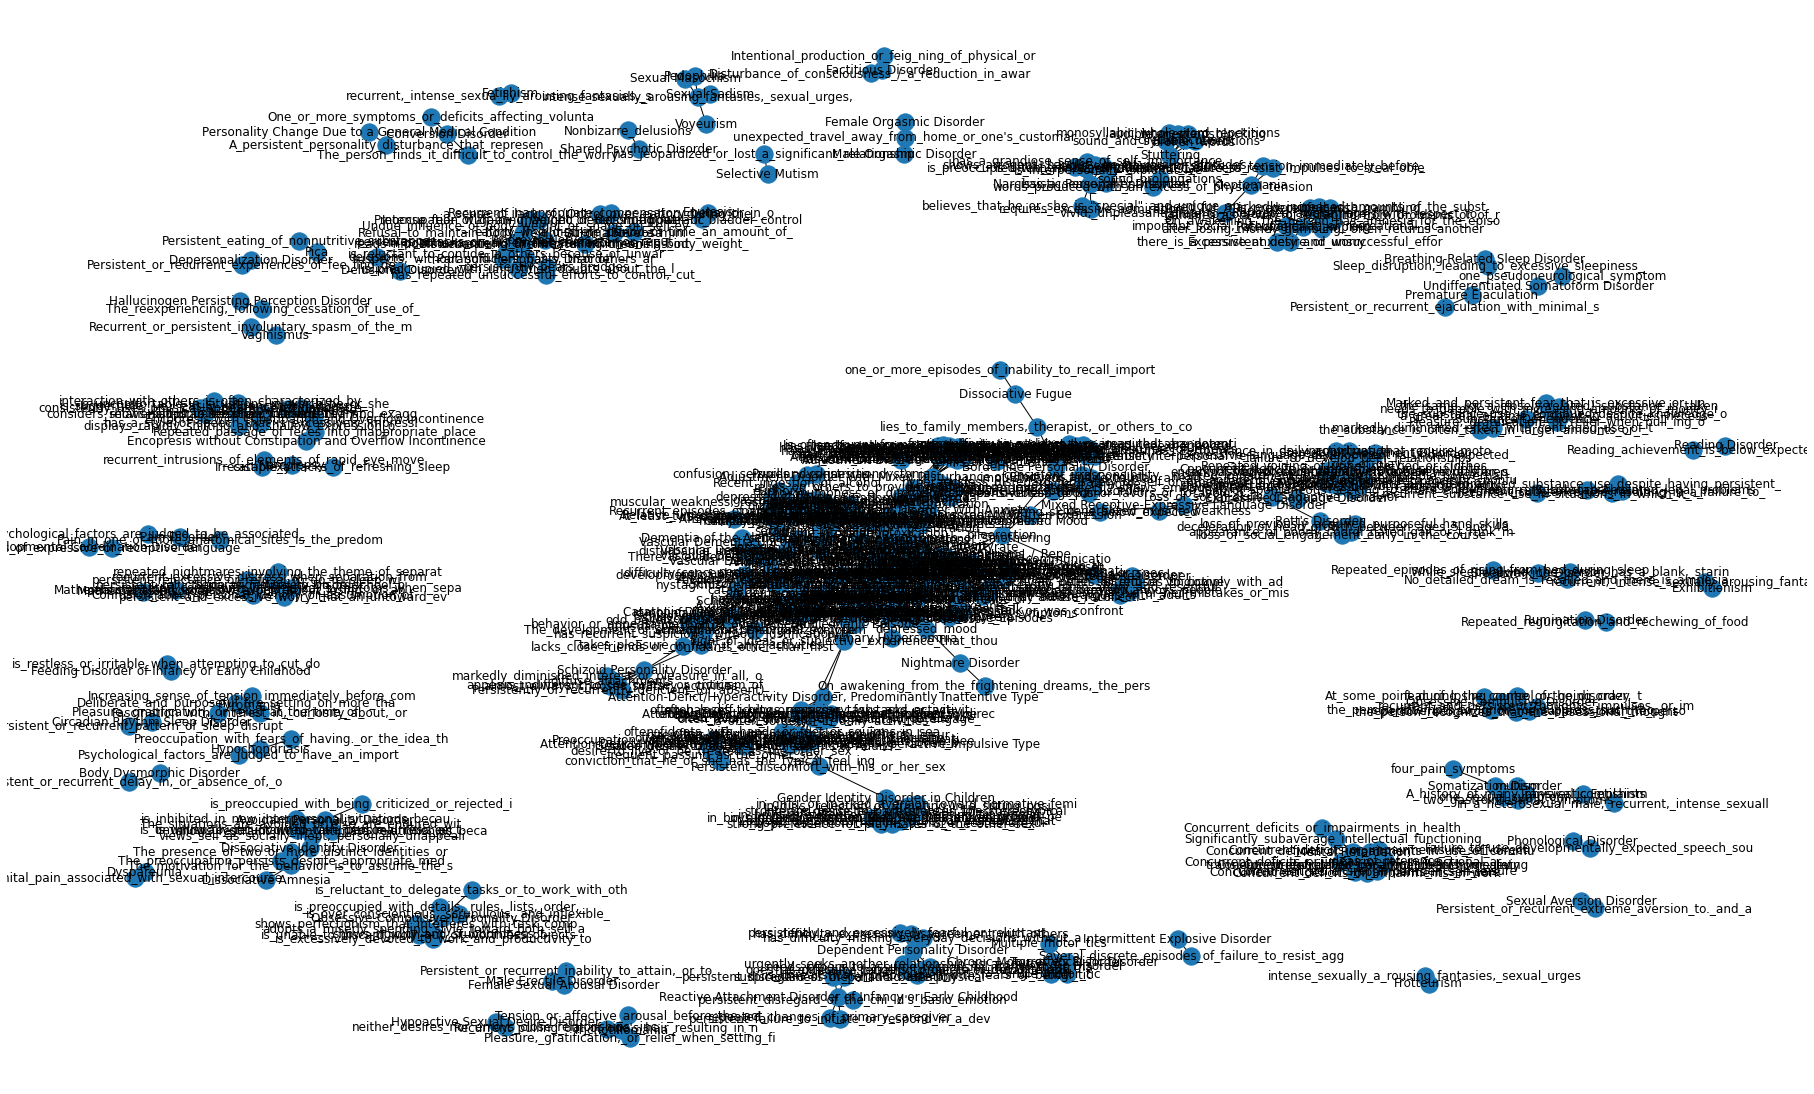

In [77]:
plt.rcParams["figure.figsize"] = (25,15)
nx.draw(G, nx.spring_layout(G), with_labels=True)

# bipart

In [0]:
print ("Number of Nodes:")
print (G.number_of_nodes())
print ()

print ("Number of Edges:")
print (G.number_of_edges())
print ()

# Subgraph: 
#     subset of nodes in a network, along with all of the edges linking these nodes. 
#
# Component Subgraph (or simply Component): 
#     portions of the network that are disconnected from each other. 

print ("Number of Component Subgraphs:")
#print ([len(list(nx.connected_components(G)))])
print ()

print ("Number of Nodes in Component Subgraphs with > 10 Nodes:")
#x= [len(G.subgraph(c)) for c in nx.connected_components(G)]
print (x)
print ()


In [0]:

# Islands:
#     trim edges that are weak (ex: only retain edges with >= 25 retweets).
#     what remains is subcores of maximal activity between nodes that have 
#         developed a trust relationship.

def trim_edges(g, threshold=1):
    gtmp = networkx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > threshold:
            gtmp.add_edge(f,to,edata)
    return gtmp

print ('Threshold', 'Nodes', 'Islands')
for threshold in range(0,25):
    g = trim_edges(G, threshold)
    print (threshold, g.number_of_nodes(), len(list(networkx.connected_component_subgraphs(g))))
print ()

In [0]:

# Ego Networks:
#     subnetworks that are centered on a certain node.
#     derived by running a breath-first search, and limiting depth to <= 3.
#         intuitivel this is becuase, we know our friends quite well, 
#         our friends’ friends somewhat well, 
#         and our friends’ friends’ friends almost not at all.

ben = networkx.Graph(networkx.ego_graph(G, 'Loss_of_social_skills_or_adaptive_behavior', radius=3))
gen = networkx.Graph(networkx.ego_graph(G, 'loss_of_social_engagement_early_in_the_course', radius=3))
print ('Ego(r=3)', 'Nodes', 'Edges')
print ('Loss_of_social_skills_or_adaptive_behavior', ben.number_of_nodes(), ben.number_of_edges())
print ('loss_of_social_engagement_early_in_the_course', gen.number_of_nodes(), gen.number_of_edges())
print ()


In [0]:



# Clustering Coefficient:
#     measures the proportion of teh ego's friends that are also friends with each other  
#     star networks with a single broadcast node and passive listeners have a low clustering coefficient.
#     dense ego networks with a lot of mutual trust have a high clustering coefficient.

ben = networkx.Graph(networkx.ego_graph(G, 'Loss_of_social_skills_or_adaptive_behavior', radius=1))
gen = networkx.Graph(networkx.ego_graph(G, 'loss_of_social_engagement_early_in_the_course', radius=1))
print ('Ego(r=1)', 'Nodes', 'Edges', 'ClusCoeff')
print ('Loss_of_social_skills_or_adaptive_behavior', ben.number_of_nodes(), ben.number_of_edges(), networkx.average_clustering(ben))
print ('loss_of_social_engagement_early_in_the_course', gen.number_of_nodes(), gen.number_of_edges(), networkx.average_clustering(gen))
print ()

# Cliques:
#     A clique is defined as a maximal complete subgraph of a given graph—i.e., 
#     a group of people where everybody is connected directly to everyone else. 
# we could find cliques for the twitter data above but since that can take time,
# we will look at the bull_graph instead
G = generators.small.bull_graph()
print (list(networkx.find_cliques(G)))